# Load Libraries and Clean Dataframes

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
airbnb_premodel_df = pd.read_csv("cleaned_data/airbnb_data_clean.csv", index_col=0)

In [3]:
zillow_premodel_df = pd.read_csv("cleaned_data/zillow_data_clean.csv", index_col=0)

In [4]:
airbnb_premodel_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2015-10-03,5795487,30066816,f,1.0,District 1,37080.0,36.274038,-86.910077,House,...,19,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.52
1,2015-10-03,8082102,55304,f,1.0,District 1,37189.0,36.259632,-86.870691,House,...,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.17
2,2015-10-03,2480117,3155867,f,3.0,District 1,37218.0,36.217547,-86.843971,House,...,60,83.0,8.0,8.0,9.0,9.0,8.0,9.0,t,3.34
3,2015-10-03,8291271,1356379,f,1.0,District 1,37218.0,36.212933,-86.853004,House,...,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.17
4,2015-10-03,997187,5479170,f,1.0,District 1,37218.0,36.221009,-86.873935,House,...,4,100.0,8.0,10.0,10.0,10.0,10.0,10.0,f,0.15


In [5]:
zillow_premodel_df.head()

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,38476,37141,38454,37057,37016,38567,37151,38552,37152,37140
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,112408.0,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN
1996-02-29,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,111101.0,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN
1996-03-31,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,110610.0,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN
1996-04-30,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,109545.0,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN
1996-05-31,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,108860.0,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN


# Further Clean Airbnb Data

## One-hot encode categorical variables

In [6]:
airbnb_premodel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   last_scraped                 233369 non-null  object 
 1   id                           233369 non-null  int64  
 2   host_id                      233369 non-null  int64  
 3   host_is_superhost            233369 non-null  object 
 4   host_listings_count          233369 non-null  float64
 5   neighbourhood_cleansed       233369 non-null  object 
 6   zipcode                      233369 non-null  float64
 7   latitude                     233369 non-null  float64
 8   longitude                    233369 non-null  float64
 9   property_type                233369 non-null  object 
 10  room_type                    233369 non-null  object 
 11  accommodates                 233369 non-null  int64  
 12  bathrooms                    233369 non-null  float64
 13 

- **Name** - to be dropped before modeling.
- **host_id** - to be used to create host listing count
- **host_is_superhost** - convert to binary
- **neighbourhood** - one hot encode
- **property type** - one hot encode
- **room type** - one hot encode
- **instant bookable** - convert to binary

### Binarize host_is_superhost and instant_bookable

In [7]:
binary_dict = {'f':0, 't':1}

airbnb_premodel_df['host_is_superhost'] = airbnb_premodel_df['host_is_superhost'].map(binary_dict)
airbnb_premodel_df['instant_bookable'] = airbnb_premodel_df['instant_bookable'].map(binary_dict)
airbnb_premodel_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2015-10-03,5795487,30066816,0,1.0,District 1,37080.0,36.274038,-86.910077,House,...,19,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3.52
1,2015-10-03,8082102,55304,0,1.0,District 1,37189.0,36.259632,-86.870691,House,...,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.17
2,2015-10-03,2480117,3155867,0,3.0,District 1,37218.0,36.217547,-86.843971,House,...,60,83.0,8.0,8.0,9.0,9.0,8.0,9.0,1,3.34
3,2015-10-03,8291271,1356379,0,1.0,District 1,37218.0,36.212933,-86.853004,House,...,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.17
4,2015-10-03,997187,5479170,0,1.0,District 1,37218.0,36.221009,-86.873935,House,...,4,100.0,8.0,10.0,10.0,10.0,10.0,10.0,0,0.15


### Create Categories for Neighborhood

In [8]:
# update districts to int for easier mapping
airbnb_premodel_df['neighbourhood_cleansed'] = airbnb_premodel_df['neighbourhood_cleansed'].apply(lambda x: x.split()[1]).astype(int)

In [9]:
airbnb_premodel_df['neighbourhood_cleansed']

0          1
1          1
2          1
3          1
4          1
          ..
233406    19
233407     5
233408    19
233409     6
233410    21
Name: neighbourhood_cleansed, Length: 233369, dtype: int32

In [10]:
district_dict = {}

district_dict = dict.fromkeys([1],'Whites_Creek')
district_dict.update(dict.fromkeys([2,21], 'North_Nashville'))
district_dict.update(dict.fromkeys([3], 'Parkwood'))
district_dict.update(dict.fromkeys([4,26,27,30,31], 'Southeast_Nashville'))
district_dict.update(dict.fromkeys([5,6,7,8], 'East_Nashville'))
district_dict.update(dict.fromkeys([9,10], 'Madison'))
district_dict.update(dict.fromkeys([11,12,14,15], 'Donelson'))
district_dict.update(dict.fromkeys([16,17], 'South_Nashville'))
district_dict.update(dict.fromkeys([18,25,34], 'Midtown'))
district_dict.update(dict.fromkeys([19], 'Downtown'))
district_dict.update(dict.fromkeys([20,23,24], 'West_Nashville'))
district_dict.update(dict.fromkeys([22,35], 'Bellevue'))
district_dict.update(dict.fromkeys([13,28,29,32,33], 'Antioch'))

In [11]:
district_dict

{1: 'Whites_Creek',
 2: 'North_Nashville',
 21: 'North_Nashville',
 3: 'Parkwood',
 4: 'Southeast_Nashville',
 26: 'Southeast_Nashville',
 27: 'Southeast_Nashville',
 30: 'Southeast_Nashville',
 31: 'Southeast_Nashville',
 5: 'East_Nashville',
 6: 'East_Nashville',
 7: 'East_Nashville',
 8: 'East_Nashville',
 9: 'Madison',
 10: 'Madison',
 11: 'Donelson',
 12: 'Donelson',
 14: 'Donelson',
 15: 'Donelson',
 16: 'South_Nashville',
 17: 'South_Nashville',
 18: 'Midtown',
 25: 'Midtown',
 34: 'Midtown',
 19: 'Downtown',
 20: 'West_Nashville',
 23: 'West_Nashville',
 24: 'West_Nashville',
 22: 'Bellevue',
 35: 'Bellevue',
 13: 'Antioch',
 28: 'Antioch',
 29: 'Antioch',
 32: 'Antioch',
 33: 'Antioch'}

In [12]:
airbnb_premodel_df['neighborhood'] = airbnb_premodel_df['neighbourhood_cleansed'].map(district_dict)

In [13]:
airbnb_premodel_df.drop(columns='neighbourhood_cleansed', inplace=True)

### Convert Property_type into categories

In [14]:
airbnb_premodel_df.property_type.value_counts()

House                       83453
Apartment                   48013
Condominium                 15571
Townhouse                   15067
Entire house                13731
                            ...  
Castle                          4
Hut                             3
Private room                    1
Shared room in townhouse        1
Cave                            1
Name: property_type, Length: 90, dtype: int64

In [15]:
def updated_prop_type(x):
    prop_types = ['House', 'Apartment', 'Condominium', 'Townhouse', 'Other']
    if x not in prop_types:
        return 'Other'
    else:
        return x

In [16]:
airbnb_premodel_df['property_type'] = airbnb_premodel_df['property_type'].apply(lambda x: updated_prop_type(x))

In [17]:
airbnb_premodel_df.property_type.value_counts()

House          83453
Other          71265
Apartment      48013
Condominium    15571
Townhouse      15067
Name: property_type, dtype: int64

### Perform get dummies on categoricals

In [18]:
df_cat = airbnb_premodel_df[['property_type','room_type','neighborhood']]

In [19]:
dummies_df = pd.get_dummies(df_cat, drop_first=True)

In [20]:
airbnb_model_df = pd.concat([airbnb_premodel_df,dummies_df], axis=1)
airbnb_model_df.drop(columns=['property_type','room_type','neighborhood'], inplace=True)

In [21]:
airbnb_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   host_listings_count               233369 non-null  float64
 5   zipcode                           233369 non-null  float64
 6   latitude                          233369 non-null  float64
 7   longitude                         233369 non-null  float64
 8   accommodates                      233369 non-null  int64  
 9   bathrooms                         233369 non-null  float64
 10  beds                              233369 non-null  float64
 11  price                             233369 non-null  f

## Feature Engineering

### Add Monthly Reviews Column

In [22]:
# airbnb_model_df['id_count'] = airbnb_model_df.groupby('id').cumcount()+1

# airbnb_model_df.sort_values(by=['id','last_scraped',], ascending=True, inplace=True)

# airbnb_model_df['monthly_reviews'] = airbnb_model_df['number_of_reviews'].diff()

# airbnb_model_df.loc[airbnb_model_df['id_count']==1,'monthly_reviews']= np.nan

# airbnb_model_df['monthly_reviews'] = airbnb_model_df['monthly_reviews'].fillna(airbnb_model_df['number_of_reviews'])

# airbnb_model_df

### Add Occupancy Rate

Based on inside Airbnb's methodology, we assume 50% of bookings result in reviews. We will add a bookings column to our dataset.

In [23]:
airbnb_model_df['reviews_per_month']

0         3.52
1         2.17
2         3.34
3         2.17
4         0.15
          ... 
233406    2.17
233407    2.17
233408    2.17
233409    2.17
233410    2.17
Name: reviews_per_month, Length: 233369, dtype: float64

In [24]:
airbnb_model_df['monthly_bookings'] = airbnb_model_df['reviews_per_month']/.50

In [25]:
#airbnb_model_df['monthly_bookings'] = airbnb_model_df['monthly_reviews']/.50

Unless there is a minimum number of nights provided, we will assume the national average of 3 nights per booking.

In [26]:
airbnb_model_df['minimum_nights'].value_counts()

2.0      104398
1.0       93784
3.0       17839
30.0       9493
31.0       1958
4.0        1600
90.0        846
5.0         591
7.0         527
14.0        471
28.0        385
29.0        202
6.0         197
60.0        153
10.0        116
32.0        108
20.0         87
21.0         86
180.0        83
15.0         63
45.0         57
12.0         37
150.0        30
25.0         29
199.0        23
550.0        21
35.0         20
26.0         19
120.0        19
365.0        17
91.0         16
360.0        16
36.0         10
75.0         10
23.0          8
80.0          8
300.0         7
22.0          7
27.0          5
92.0          4
17.0          4
8.0           3
359.0         3
50.0          2
18.0          2
89.0          2
200.0         1
13.0          1
160.0         1
Name: minimum_nights, dtype: int64

In [27]:
airbnb_model_df['ALOS'] = airbnb_model_df['minimum_nights']

In [28]:
airbnb_model_df.loc[airbnb_model_df['minimum_nights']<3,'ALOS']= 3

In [29]:
airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,monthly_bookings,ALOS
0,2015-10-03,5795487,30066816,0,1.0,37080.0,36.274038,-86.910077,2,1.0,...,0,0,0,0,0,0,0,1,7.04,3.0
1,2015-10-03,8082102,55304,0,1.0,37189.0,36.259632,-86.870691,4,1.0,...,0,0,0,0,0,0,0,1,4.34,3.0
2,2015-10-03,2480117,3155867,0,3.0,37218.0,36.217547,-86.843971,2,0.5,...,0,0,0,0,0,0,0,1,6.68,3.0
3,2015-10-03,8291271,1356379,0,1.0,37218.0,36.212933,-86.853004,2,1.0,...,0,0,0,0,0,0,0,1,4.34,3.0
4,2015-10-03,997187,5479170,0,1.0,37218.0,36.221009,-86.873935,1,2.0,...,0,0,0,0,0,0,0,1,0.30,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233406,2020-09-28,45576637,205078166,1,8.0,37203.0,36.151960,-86.722620,2,1.0,...,0,0,0,0,0,0,0,0,4.34,3.0
233407,2020-09-29,45579597,94998356,0,1.0,37207.0,36.208490,-86.762600,1,1.5,...,0,0,0,0,0,0,0,0,4.34,30.0
233408,2020-09-28,45579928,43945988,0,33.0,37203.0,36.167450,-86.782230,4,1.0,...,0,0,0,0,0,0,0,0,4.34,3.0
233409,2020-09-28,45595707,10919198,0,0.0,37206.0,36.191050,-86.730820,13,3.0,...,0,0,0,0,0,0,0,0,4.34,3.0


In [30]:
# occupancy rate = average length of stay x bookings / time period
airbnb_model_df['occ_rate'] = (airbnb_model_df['ALOS']*airbnb_model_df['monthly_bookings'])/30.416

In [31]:
airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,monthly_bookings,ALOS,occ_rate
0,2015-10-03,5795487,30066816,0,1.0,37080.0,36.274038,-86.910077,2,1.0,...,0,0,0,0,0,0,1,7.04,3.0,0.694371
1,2015-10-03,8082102,55304,0,1.0,37189.0,36.259632,-86.870691,4,1.0,...,0,0,0,0,0,0,1,4.34,3.0,0.428064
2,2015-10-03,2480117,3155867,0,3.0,37218.0,36.217547,-86.843971,2,0.5,...,0,0,0,0,0,0,1,6.68,3.0,0.658864
3,2015-10-03,8291271,1356379,0,1.0,37218.0,36.212933,-86.853004,2,1.0,...,0,0,0,0,0,0,1,4.34,3.0,0.428064
4,2015-10-03,997187,5479170,0,1.0,37218.0,36.221009,-86.873935,1,2.0,...,0,0,0,0,0,0,1,0.30,3.0,0.029590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233406,2020-09-28,45576637,205078166,1,8.0,37203.0,36.151960,-86.722620,2,1.0,...,0,0,0,0,0,0,0,4.34,3.0,0.428064
233407,2020-09-29,45579597,94998356,0,1.0,37207.0,36.208490,-86.762600,1,1.5,...,0,0,0,0,0,0,0,4.34,30.0,4.280642
233408,2020-09-28,45579928,43945988,0,33.0,37203.0,36.167450,-86.782230,4,1.0,...,0,0,0,0,0,0,0,4.34,3.0,0.428064
233409,2020-09-28,45595707,10919198,0,0.0,37206.0,36.191050,-86.730820,13,3.0,...,0,0,0,0,0,0,0,4.34,3.0,0.428064


In [32]:
airbnb_model_df.occ_rate.value_counts()

0.428064     27977
0.197265      3781
4.280642      2336
0.394529      2115
0.591794      1316
             ...  
6.536034         1
10.731194        1
11.109285        1
0.134797         1
0.516176         1
Name: occ_rate, Length: 3314, dtype: int64

In [33]:
airbnb_model_df.drop(columns=['monthly_bookings','ALOS'], inplace=True)

In [34]:
airbnb_model_df.to_csv("cleaned_data/airbnb_model_data_clean.csv")

## Create Separate Dataframes for each Neighborhood

In [35]:
airbnb_premodel_df.neighborhood.value_counts()

East_Nashville         57168
Downtown               56302
South_Nashville        31846
North_Nashville        23139
Midtown                15419
West_Nashville         14058
Donelson               13837
Southeast_Nashville     7142
Antioch                 6677
Bellevue                2505
Madison                 2095
Whites_Creek            1919
Parkwood                1262
Name: neighborhood, dtype: int64

In [36]:
east_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='East_Nashville']
downtown_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Downtown']
south_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='South_Nashville']
north_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='North_Nashville']
midtown_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Midtown']
west_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='West_Nashville']
donelson_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Donelson']
southeast_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Southeast_Nashville']
antioch_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Antioch']
bellevue_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Bellevue']
madison_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Madison']
whitescreek_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Whites_Creek']
parkwood_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Parkwood']

## Create DataFrame for all current listings

In [37]:
current_listings_df = airbnb_premodel_df[airbnb_premodel_df['last_scraped']>'2021-02']

In [38]:
current_listings_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,neighborhood
93447,2021-02-20,6422,12172,1,0.0,37206.0,36.17315,-86.73581,Other,Private room,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4.69,East_Nashville
93448,2021-02-20,25613,95811,1,1.0,37206.0,36.17826,-86.74162,Other,Private room,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.87,East_Nashville
93449,2021-02-20,136015,666322,0,4.0,37214.0,36.19464,-86.67195,Other,Entire home/apt,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.43,Donelson
93450,2021-02-20,258817,22296,1,16.0,37076.0,36.16249,-86.58988,Other,Private room,...,95.0,10.0,9.0,10.0,10.0,9.0,9.0,0,0.86,Donelson
93451,2021-02-20,289242,22296,1,16.0,37076.0,36.16102,-86.59207,Other,Private room,...,94.0,9.0,8.0,10.0,9.0,9.0,9.0,0,0.68,Donelson


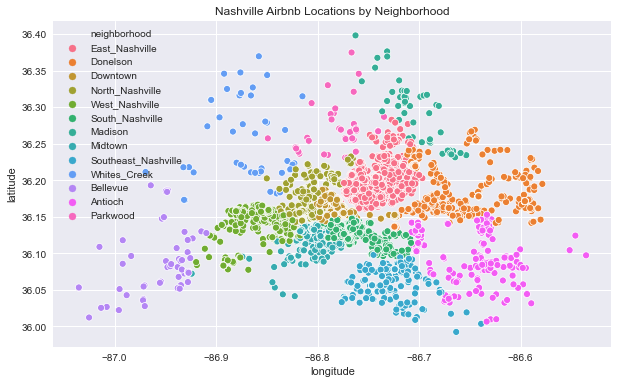

In [39]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='neighborhood')
ax.set_title('Nashville Airbnb Locations by Neighborhood')
plt.legend(loc='best');

## Create DateTime Index Monthly Dataframe

In [39]:
airbnb_model_df['last_scraped'] = pd.to_datetime(airbnb_model_df['last_scraped'],format='%Y/%m/%d')
airbnb_model_df.set_index('last_scraped', inplace=True)

In [40]:
# resample dataframe on a monthly basis
airbnb_monthly = airbnb_model_df.resample('MS')

In [41]:
# use count as the monthly aggregator
airbnb_monthly_count = airbnb_monthly.count()
airbnb_monthly_count.head()

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
2015-07-01,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,...,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615
2015-08-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-10-01,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,...,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110


In [42]:
# use sum as the monthly aggregator
airbnb_monthly_sum = airbnb_monthly.sum()
airbnb_monthly_sum.head()

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,594245872,2235908860,23,285.0,4501454.0,4375.591454,-10498.980084,511,175.5,246.0,...,52.0,1.0,10.0,6.0,1.0,15.0,4.0,8.0,3.0,52.223830
2015-07-01,7405782055,25654950542,285,16901.0,60081558.0,58393.913730,-140129.214995,7441,2423.0,3729.0,...,557.0,12.0,172.0,49.0,6.0,208.0,63.0,117.0,9.0,710.729221
2015-08-01,0,0,0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2015-09-01,0,0,0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2015-10-01,11469696350,39200140624,434,24987.0,78494993.0,76290.349910,-183079.191933,10119,3226.0,5077.0,...,709.0,21.0,236.0,76.0,10.0,260.0,83.0,150.0,23.0,1038.485008


In [43]:
airbnb_monthly_sum.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_listings_count', 'zipcode',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'property_type_Condominium', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood',

In [44]:
# use mean as the monthly aggregator
airbnb_monthly_mean = airbnb_monthly.mean()
airbnb_monthly_mean.head()

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,4.911123e+06,1.847859e+07,0.190083,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,...,0.429752,0.008264,0.082645,0.049587,0.008264,0.123967,0.033058,0.066116,0.024793,0.431602
2015-07-01,4.585624e+06,1.588542e+07,0.176471,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,...,0.344892,0.007430,0.106502,0.030341,0.003715,0.128793,0.039009,0.072446,0.005573,0.440080
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,5.435875e+06,1.857827e+07,0.205687,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,...,0.336019,0.009953,0.111848,0.036019,0.004739,0.123223,0.039336,0.071090,0.010900,0.492173


In [45]:
cat_cols = ['host_is_superhost','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [46]:
categorical_sums = airbnb_monthly_sum[cat_cols]

In [47]:
airbnb_monthly_mean.drop(columns=cat_cols, inplace=True)
airbnb_monthly_mean = pd.concat([airbnb_monthly_mean,categorical_sums], axis=1)

In [48]:
airbnb_monthly_mean.columns

Index(['id', 'host_id', 'host_listings_count', 'zipcode', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'occ_rate',
       'host_is_superhost', 'instant_bookable', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek', 'property_type_Condominium',
       'proper

In [49]:
airbnb_monthly_mean['inventory'] = airbnb_monthly.count()['id']

In [50]:
airbnb_monthly_mean

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,4.911123e+06,1.847859e+07,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,8.0,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,121
2015-07-01,4.585624e+06,1.588542e+07,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,202.349226,...,117.0,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,1615
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2015-10-01,5.435875e+06,1.857827e+07,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,200.524171,...,150.0,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,2.947930e+07,1.089430e+08,44.070025,37202.054170,36.161081,-86.769555,6.279273,1.912799,3.715442,212.609249,...,324.0,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,6055
2020-11-01,2.973666e+07,1.117253e+08,44.364508,37202.339950,36.160847,-86.770116,6.231287,1.907149,3.692683,211.482086,...,324.0,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,5945
2020-12-01,3.052512e+07,1.180080e+08,45.724200,37202.158459,36.160308,-86.769276,6.198440,1.906143,3.645701,212.335529,...,334.0,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,6153


In [51]:
# airbnb_monthly_mean['neighborhood_Bellevue'] = airbnb_monthly.sum()['neighborhood_Bellevue']
# airbnb_monthly_mean['neighborhood_Donelson'] = airbnb_monthly.sum()['neighborhood_Donelson']
# airbnb_monthly_mean['neighborhood_Downtown'] = airbnb_monthly.sum()['neighborhood_Downtown']
# airbnb_monthly_mean['neighborhood_East_Nashville'] = airbnb_monthly.sum()['neighborhood_East_Nashville']
# airbnb_monthly_mean['neighborhood_Madison'] = airbnb_monthly.sum()['neighborhood_Madison']
# airbnb_monthly_mean['neighborhood_Midtown'] = airbnb_monthly.sum()['neighborhood_Midtown']
# airbnb_monthly_mean['neighborhood_North_Nashville'] = airbnb_monthly.sum()['neighborhood_North_Nashville']
# airbnb_monthly_mean['neighborhood_Parkwood'] = airbnb_monthly.sum()['neighborhood_Parkwood']
# airbnb_monthly_mean['neighborhood_South_Nashville'] = airbnb_monthly.sum()['neighborhood_South_Nashville']
# airbnb_monthly_mean['neighborhood_Southeast_Nashville'] = airbnb_monthly.sum()['neighborhood_Southeast_Nashville']
# airbnb_monthly_mean['neighborhood_West_Nashville'] = airbnb_monthly.sum()['neighborhood_West_Nashville']
# airbnb_monthly_mean['neighborhood_Whites_Creek'] = airbnb_monthly.sum()['neighborhood_Whites_Creek']

# Further Clean Zillow Data

In [52]:
zillow_premodel_df.head()

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,38476,37141,38454,37057,37016,38567,37151,38552,37152,37140
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,112408.0,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN
1996-02-29,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,111101.0,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN
1996-03-31,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,110610.0,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN
1996-04-30,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,109545.0,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN
1996-05-31,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,108860.0,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN


## Fix Datetime index

In [53]:
zillow_premodel_df.reset_index(inplace=True)
zillow_premodel_df['index'] = pd.to_datetime(zillow_premodel_df['index'],format='%Y/%m/%d')
zillow_premodel_df.set_index('index', inplace=True)

In [54]:
# zillow data should already be monthly, but we will resample to make sure
zillow_monthly = zillow_premodel_df.resample('MS').mean()
zillow_monthly.head()

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,38476,37141,38454,37057,37016,38567,37151,38552,37152,37140
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,112408.0,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN
1996-02-01,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,111101.0,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN
1996-03-01,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,110610.0,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN
1996-04-01,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,109545.0,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN
1996-05-01,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,108860.0,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN


## Add total average home value

In [55]:
# add a total average to column
zillow_monthly['avg_home_value'] = zillow_monthly.mean(axis=1)

In [56]:
zillow_monthly.head()

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,37141,38454,37057,37016,38567,37151,38552,37152,37140,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN,109399.880435
1996-02-01,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN,109566.967391
1996-03-01,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN,109809.858696
1996-04-01,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN,110273.195652
1996-05-01,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN,110767.663043


In [57]:
avg_home_value_df = pd.DataFrame(zillow_monthly['avg_home_value'])
avg_home_value_df

,avg_home_value
index,
1996-01-01,109399.880435
1996-02-01,109566.967391
1996-03-01,109809.858696
1996-04-01,110273.195652
1996-05-01,110767.663043
...,...
2020-10-01,288751.259615
2020-11-01,291187.711538
2020-12-01,293967.509615


In [58]:
zillow_monthly.to_csv("cleaned_data/zillow_model_data_clean.csv")

# Merge Airbnb and Zillow Data

In [59]:
clean_data_df = pd.merge(airbnb_monthly_mean, avg_home_value_df, how='inner',
                        left_index=True, right_index=True)

In [60]:
clean_data_df

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory,avg_home_value
2015-06-01,4.911123e+06,1.847859e+07,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,121,194391.913462
2015-07-01,4.585624e+06,1.588542e+07,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,202.349226,...,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,1615,195615.557692
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,196760.903846
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,198188.798077
2015-10-01,5.435875e+06,1.857827e+07,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,200.524171,...,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,2110,199658.365385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,2.947930e+07,1.089430e+08,44.070025,37202.054170,36.161081,-86.769555,6.279273,1.912799,3.715442,212.609249,...,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,6055,288751.259615
2020-11-01,2.973666e+07,1.117253e+08,44.364508,37202.339950,36.160847,-86.770116,6.231287,1.907149,3.692683,211.482086,...,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,5945,291187.711538
2020-12-01,3.052512e+07,1.180080e+08,45.724200,37202.158459,36.160308,-86.769276,6.198440,1.906143,3.645701,212.335529,...,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,6153,293967.509615
2021-01-01,3.076685e+07,1.191460e+08,47.797448,37201.979548,36.160198,-86.769105,6.201080,1.907723,3.649215,225.319863,...,47.0,0.0,0.0,6112.0,0.0,76.0,647.0,17.0,6112,296722.163462


In [61]:
clean_data_df.to_csv("cleaned_data/model_data_clean.csv")